In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/apple/anaconda3/envs/env-python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


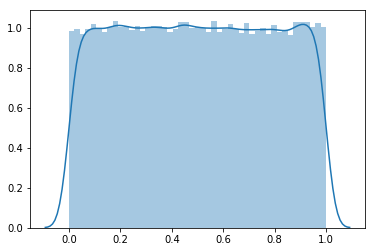

In [22]:
sample = np.random.uniform(size=100000)
sns.distplot(sample, hist=True, kde=True)

## Sampling from a distribution 
The task at hand is to sample from the univariate normal distribution. To calculate the probability for event $X$ such that
$$ X \sim \mathcal{N}(0,1) $$
$$ f(x) = \frac{1}{{\sigma \sqrt {2\pi } }}\exp{{\frac {(x - \mu)^2}{2 \sigma}}} $$
We need to simulate the Probability = $P(X > 5)$
This can be done using the box muller algorithm to generate the p.d.f of Normal Distribution from $U(0,1)$

In [14]:
# Simulate the normal density 
# Using Box Muller Algorithm 
from numpy.random import uniform 
size = 10000000
unif1 = np.array(uniform(size=size))
unif2 = np.array(uniform(size=size))

LOG = np.log(unif1)
r = (-2*LOG)**0.5
theta = 2*np.pi*unif2
x = r*np.cos(theta)
y = r*np.sin(theta)

/Users/apple/anaconda3/envs/env-python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


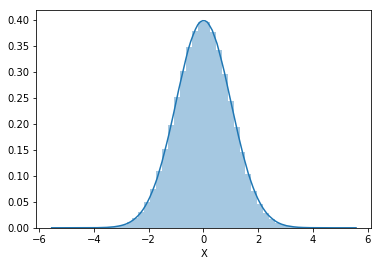

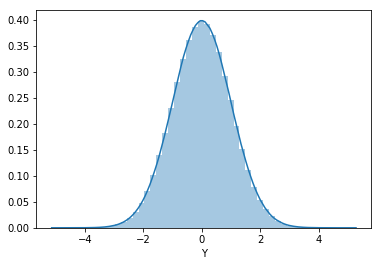

In [15]:
sns.distplot(x, hist=True, kde=True)
plt.xlabel('X')
plt.show()
sns.distplot(y, hist=True, kde=True)
plt.xlabel('Y')
plt.show()


In [16]:
# Computing the probability
sum = 0
# Indicator Random variable h(x)
def h(x):
    if(x > 5):
        return 1
    else:
        return 0
for xi in list(x):
    sum += h(xi)
box_estimates = np.array([h(xi) for xi in list(x)])
E_box = sum/(len(x))
print(E_box)

3e-07


We see that the Probability of $P(\mathbf{X}>5)$ is Out[14]: which comes for 100,000,000 simulations


## Monte Carlo Integration 
Monte Carlo is the art of approximating an expectation by the sample
mean of a function of simulated random variables. 

### Problem Statement
We need to sample according to the function $$g(x) = \frac{e^{-(x - \delta)}}{\int_{\delta}^{\infty}e^{-(x - \delta)}}$$

We have computed the random sample for $f(x)$ to compute the $E_{f}[\mathbf{X}]$
### Importance Sampling
There is an easier way to compute the expectation of the random variable X. 
$$\Rightarrow E_{f}[h(\mathbf{X})] = E_{g}[h(\mathbf{X})\frac{f(\mathbf{X})}{g(\mathbf{X})}]$$

In [8]:
def g(x):
    exponent = np.exp(-x+5)
    return exponent
    
def f(x):
    gauss = np.exp(-x**2/2)/(np.pi*2)**0.5
    return gauss

/Users/apple/anaconda3/envs/env-python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


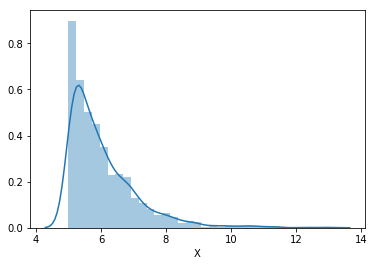

(1000,)


In [18]:
# Estimating the Expectation value from random sampling
# Generate the random variable g(x)
dummy_uniform = np.array(uniform(size=1000))
exponential = -np.log(dummy_uniform) + 5

sns.distplot(exponential, hist=True, kde=True)
plt.xlabel("X")
plt.show()

print(dummy_uniform.shape)

In [19]:
sum = 0
for xi in list(exponential):
    sum += h(xi)*(f(xi)/g(xi))
importance_sample_estimate = np.array([h(xi)*(f(xi)/g(xi)) for xi in list(exponential)])
E_importance = sum/(len(exponential))
print(importance_sample_estimate)
print(E_importance)

[9.89301388e-07 2.05672405e-13 2.58558112e-09 1.96455595e-07
 1.50273172e-07 1.28197273e-09 3.58801300e-07 7.28900804e-07
 9.50512603e-07 6.97207635e-07 1.06844955e-14 1.15345403e-06
 1.99407759e-12 1.47805104e-06 3.13319371e-09 2.08890243e-16
 2.50902399e-07 1.12032225e-07 5.24363536e-09 9.85086315e-08
 4.26273578e-07 1.17858154e-06 5.06447041e-13 5.07858343e-09
 7.83891683e-07 3.35605135e-10 2.87323493e-07 1.76747205e-07
 9.09220059e-08 1.13626381e-07 5.01747233e-07 3.67853792e-15
 8.06396159e-08 4.54983763e-07 2.31962737e-07 2.77196039e-10
 1.65868995e-08 1.78157726e-07 2.07521012e-07 1.26496100e-07
 1.99281105e-13 4.73538139e-08 1.59069702e-07 1.07741069e-06
 1.15740563e-06 2.33846173e-08 9.17681097e-08 4.42372049e-07
 3.95778341e-12 4.74669544e-07 6.75695215e-09 7.39770537e-09
 2.39229692e-08 1.34577020e-08 1.37025382e-06 1.36926515e-06
 2.67368561e-07 2.78568649e-10 2.21357252e-12 3.68383712e-08
 1.72423001e-07 6.10654482e-08 4.27626887e-08 2.95144804e-07
 1.81990632e-15 5.329848

## Variance of Estimators

In [21]:
variance_box_muller = np.sum((box_estimates - E_box)**2)/(box_estimates.shape[0] - 1)
variance_importance_sample = np.sum((importance_sample_estimate - E_importance)**2)/(importance_sample_estimate.shape[0]-1)
print("The variance of the Box Muller Estimate is : ", variance_box_muller)
print("The variance of the Importance Sampling estimate is : ", variance_importance_sample) 


The variance of the Box Muller Estimate is :  2.9999993999999575e-07
The variance of the Importance Sampling estimate is :  1.6036163272376165e-13
